# Complex Networks
#### Igor F. Nascimento

# 1. Context
##### "Você deve escolher ao menos quatro redes disponíveis nos repositórios abaixo ou em outros repositórios (e não apenas as redes disponíveis no graph-tool), e caracterizá-las utilizando diferentes métricas, como grau, distância, tamanho das componentes conexas, e outras (você pode escolher outras). Para cada métrica analisada, calcule as seguintes estatísticas: máximo, mínimo, média, mediana, desvio padrão, e distribuição empírica (faça um gráfico). "

### 1.1 imports

In [39]:
from IPython.display import Math , Latex
import networkx as nx
from nxpd import draw
import pandas as pd
import termtables as tt
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

### 1.2 Datasets

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)

##### [`Collaboration network of Arxiv High Energy Physics Theory`](http://snap.stanford.edu/data/ca-HepTh.html)


### 1.3 Defines
##### Paths, and global variables

In [2]:
pathColab = './FirstWork/datasets/ca-HepTh.txt'
colColab = ['FromNodeID','ToNodeID']

## 2. Collaboration network
#### 2.1 Definition:
##### Arxiv HEP-TH (High Energy Physics - Theory) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to High Energy Physics - Theory category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

##### The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.

#### 2.2 Import and Characterizing the Dataset

In [3]:
df = pd.read_csv(pathColab, sep='\t', names=colColab)
G = nx.Graph()
tuples = [tuple(x) for x in df.values]
G.add_edges_from(tuples)
edges = G.edges

In [4]:
data = [["Paper Description", "Undirected", 9877, 25998],
        ["NetworkX","Undirected",  G.number_of_nodes(), G.number_of_edges()]]
print(tt.to_string(data, header=[ "Provider", "Type", "Nodes", "Edges"]))

┌───────────────────┬────────────┬───────┬───────┐
│ Provider          │ Type       │ Nodes │ Edges │
╞═══════════════════╪════════════╪═══════╪═══════╡
│ Paper Description │ Undirected │ 9877  │ 25998 │
├───────────────────┼────────────┼───────┼───────┤
│ NetworkX          │ Undirected │ 9877  │ 25998 │
└───────────────────┴────────────┴───────┴───────┘


In [5]:
print("Example of the data and Dataset descriptions \n")
print( df[0:5],'\n\n', df.describe())

Example of the data and Dataset descriptions 

   FromNodeID  ToNodeID
0       24325     24394
1       24325     40517
2       24325     58507
3       24394      3737
4       24394      3905 

          FromNodeID      ToNodeID
count  51971.000000  51971.000000
mean   34294.387389  34294.387389
std    19865.210725  19865.210725
min        1.000000      1.000000
25%    16854.000000  16854.000000
50%    34402.000000  34402.000000
75%    51315.000000  51315.000000
max    68745.000000  68745.000000


#### 2.3 Extracting Metrics
#### - Degree

In [7]:
df_stats = pd.DataFrame(nx.degree(G))
df_stats.columns = ['Node', 'Degree']
df_stats[0:5]

,Node,Degree
0,24325,3
1,24394,42
2,40517,49
3,58507,6
4,3737,22


In [8]:
data = [["Degree", df_stats['Degree'].max(), 
         df_stats['Degree'].min(), 
        df_stats['Degree'].mean(),
        df_stats['Degree'].median(),
         df_stats['Degree'].std()]]
print(tt.to_string(data, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation"]))

┌────────┬─────┬─────┬───────────────────┬────────┬────────────────────┐
│ Metric │ Max │ Min │ Average           │ Median │ Standard Deviation │
╞════════╪═════╪═════╪═══════════════════╪════════╪════════════════════╡
│ Degree │ 65  │ 1   │ 5.264351523742027 │ 3.0    │ 6.191594484556439  │
└────────┴─────┴─────┴───────────────────┴────────┴────────────────────┘


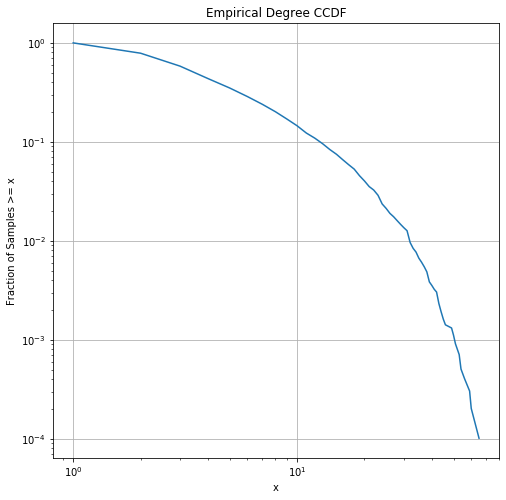

In [91]:
## Defining a function for plotting the CCDF that will be largely used in this work
def empiricalCCDF(typo, dataset, data) : 
    x,y = powerlaw.ccdf(data)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax.set_title("Empirical {} CCDF".format(typo))
    ax.plot(x, y)
    ax.set_xscale("log"), ax.set_yscale("log")
    ax.set_xlabel("x"), ax.set_ylabel("Fraction of Samples >= x")
    ax.grid(True)
    plt.savefig("./images/{}_empirical_ccdf_{}.png".format(dataset,typo), bbox_inches="tight")
    
empiricalCCDF("Degree", "ColabData", df_stats['Degree'])

#### - Distance

##### For the porpouse of reducing computational complexity <br> we can use [Chebyshev's inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality), defined as :
$$
\begin{equation*}
\mathsf{P}[|\overline{X} - \mu| < \delta] > 1 - \varepsilon \qquad (1)
\end{equation*}
$$

##### And therefore assuming normal distribution (only really strongly non-normal distributions will have any impact). <br> We want to be 99% confident that the sample mean is within 1% of the population mean'. <br> i.e. Find n such that :
$$
\begin{equation*}
\mathsf{P}[|\overline{X} - \mu| < 0.01\mu] = 0.99 \qquad (2)
\end{equation*}
$$

##### Also 99% of a normal distribution is within 2.576 s.d.'s of the population mean (from the normal table) thus:
$$
\begin{equation*}
2.576 \times \frac{\mu}{\sqrt{n}}  =  0.99 \qquad (3)
\end{equation*}
$$

## Refazer as contas ...

In [78]:
%time
n_nodes = 2
distances = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    dist.append(nx.shortest_path_length(G,source_node))
    
nodeListDist = []
for n in range(n_nodes):
    target_node = list(dist[n].keys())[0]
    nodeListDist = np.append(nodeListDist, np.array(list(dist[0].values())[1:]))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [84]:
np.median(nodeListDist)

7.0

In [87]:
data = [["Degree", df_stats['Degree'].max(), 
         df_stats['Degree'].min(), 
        df_stats['Degree'].mean(),
        df_stats['Degree'].median(),
         df_stats['Degree'].std(),
        "No"],
       ["Distance", nodeListDist.max(), 
         nodeListDist.min(), 
        nodeListDist.mean(),
        np.median(nodeListDist),
         nodeListDist.std(),
       "Yes"]]
print(tt.to_string(data, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation", "Sampled"]))

┌──────────┬──────┬─────┬───────────────────┬────────┬────────────────────┬─────────┐
│ Metric   │ Max  │ Min │ Average           │ Median │ Standard Deviation │ Sampled │
╞══════════╪══════╪═════╪═══════════════════╪════════╪════════════════════╪═════════╡
│ Degree   │ 65   │ 1   │ 5.264351523742027 │ 3.0    │ 6.191594484556439  │ No      │
├──────────┼──────┼─────┼───────────────────┼────────┼────────────────────┼─────────┤
│ Distance │ 13.0 │ 1.0 │ 6.969318050248929 │ 7.0    │ 1.1795441708572654 │ Yes     │
└──────────┴──────┴─────┴───────────────────┴────────┴────────────────────┴─────────┘


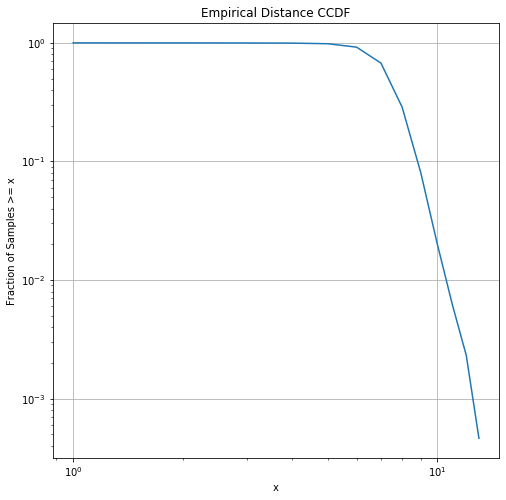

In [92]:
empiricalCCDF("Distance", "ColabData", nodeListDist)

### - Degree Centrality

In [104]:
degree_centrality =  np.around(np.array(list(nx.degree_centrality(G).values())), decimals=6)

In [100]:
degree_centrality

array([0.0003, 0.0043, 0.005 , ..., 0.0002, 0.0002, 0.0002])

In [107]:
data = [["Degree", df_stats['Degree'].max(), 
         df_stats['Degree'].min(), 
        np.around(df_stats['Degree'].mean(), decimals=5),
        df_stats['Degree'].median(),
         np.around(df_stats['Degree'].std(), decimals=5),
        "No"],
       ["Distance", nodeListDist.max(), 
         nodeListDist.min(), 
        np.around(nodeListDist.mean(), decimals=5),
        np.median(nodeListDist),
         np.around(nodeListDist.std(), decimals=5),
       "Yes"],
      ["Degree Centrality", degree_centrality.max(), 
         degree_centrality.min(), 
        np.around(degree_centrality.mean(), decimals=5),
        np.median(degree_centrality),
         np.around(degree_centrality.std(), decimals=5),
       "No"]]
print(tt.to_string(data, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation", "Sampled"]))

┌───────────────────┬──────────┬──────────┬─────────┬──────────┬────────────────────┬─────────┐
│ Metric            │ Max      │ Min      │ Average │ Median   │ Standard Deviation │ Sampled │
╞═══════════════════╪══════════╪══════════╪═════════╪══════════╪════════════════════╪═════════╡
│ Degree            │ 65       │ 1        │ 5.26435 │ 3.0      │ 6.19159            │ No      │
├───────────────────┼──────────┼──────────┼─────────┼──────────┼────────────────────┼─────────┤
│ Distance          │ 13.0     │ 1.0      │ 6.96932 │ 7.0      │ 1.17954            │ Yes     │
├───────────────────┼──────────┼──────────┼─────────┼──────────┼────────────────────┼─────────┤
│ Degree Centrality │ 0.006582 │ 0.000101 │ 0.00053 │ 0.000304 │ 0.00063            │ No      │
└───────────────────┴──────────┴──────────┴─────────┴──────────┴────────────────────┴─────────┘


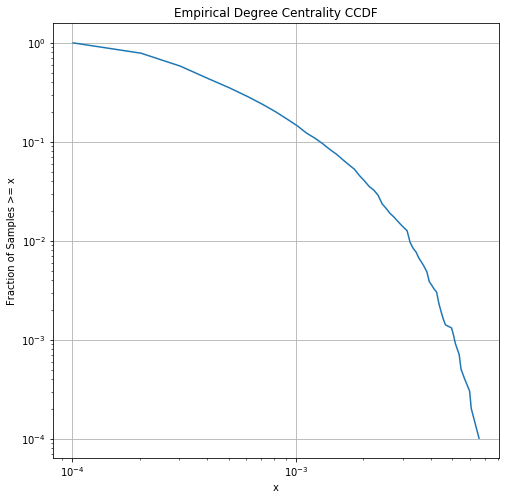

In [108]:
empiricalCCDF("Degree Centrality", "ColabData", degree_centrality)

### - Closeness Centrality

In [119]:
%time
n_nodes = 500
close_cent = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    close_cent.append(nx.closeness_centrality(G,source_node))
close_cent = np.around(np.array(close_cent), decimals=5)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [120]:
data = [["Degree", df_stats['Degree'].max(), 
         df_stats['Degree'].min(), 
        np.around(df_stats['Degree'].mean(), decimals=5),
        df_stats['Degree'].median(),
         np.around(df_stats['Degree'].std(), decimals=5),
        "No"],
       ["Distance", nodeListDist.max(), 
         nodeListDist.min(), 
        np.around(nodeListDist.mean(), decimals=5),
        np.median(nodeListDist),
         np.around(nodeListDist.std(), decimals=5),
       "Yes"],
      ["Degree Centrality", degree_centrality.max(), 
         degree_centrality.min(), 
        np.around(degree_centrality.mean(), decimals=5),
        np.median(degree_centrality),
         np.around(degree_centrality.std(), decimals=5),
       "No"],
       ["Closeness Centrality", close_cent.max(), 
         close_cent.min(), 
        np.around(close_cent.mean(), decimals=5),
        np.median(close_cent),
         np.around(close_cent.std(), decimals=5),
       "Yes"]]
print(tt.to_string(data, header=[ "Metric" , "Max", "Min", "Average", "Median", "Standard Deviation", "Sampled"]))

┌──────────────────────┬──────────┬──────────┬─────────┬──────────┬────────────────────┬─────────┐
│ Metric               │ Max      │ Min      │ Average │ Median   │ Standard Deviation │ Sampled │
╞══════════════════════╪══════════╪══════════╪═════════╪══════════╪════════════════════╪═════════╡
│ Degree               │ 65       │ 1        │ 5.26435 │ 3.0      │ 6.19159            │ No      │
├──────────────────────┼──────────┼──────────┼─────────┼──────────┼────────────────────┼─────────┤
│ Distance             │ 13.0     │ 1.0      │ 6.96932 │ 7.0      │ 1.17954            │ Yes     │
├──────────────────────┼──────────┼──────────┼─────────┼──────────┼────────────────────┼─────────┤
│ Degree Centrality    │ 0.006582 │ 0.000101 │ 0.00053 │ 0.000304 │ 0.00063            │ No      │
├──────────────────────┼──────────┼──────────┼─────────┼──────────┼────────────────────┼─────────┤
│ Closeness Centrality │ 0.21616  │ 0.0001   │ 0.12925 │ 0.14826  │ 0.05844            │ Yes     │
└─────────

In [121]:
nx.transitivity(G)

0.2839996525875546

In [122]:
%time
n_nodes = 500
triangles = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    triangles.append(nx.closeness_centrality(G,source_node))
triangles = np.around(np.array(triangles), decimals=5)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [123]:
triangles

array([1.3398e-01, 1.4686e-01, 1.2624e-01, 1.5796e-01, 1.0000e-04,
       4.5000e-04, 1.5376e-01, 1.6361e-01, 1.7330e-01, 1.4485e-01,
       1.5678e-01, 1.7674e-01, 1.6915e-01, 1.8128e-01, 1.3802e-01,
       1.7698e-01, 1.7868e-01, 1.6073e-01, 1.4808e-01, 1.7383e-01,
       1.7160e-01, 1.4810e-01, 1.5137e-01, 1.4394e-01, 1.3066e-01,
       1.9045e-01, 1.5943e-01, 1.0782e-01, 1.3299e-01, 4.1000e-04,
       1.2982e-01, 1.2443e-01, 1.1930e-01, 1.5947e-01, 1.6568e-01,
       1.1619e-01, 1.5341e-01, 1.6737e-01, 1.4085e-01, 1.7221e-01,
       1.3636e-01, 1.6967e-01, 1.2738e-01, 1.4677e-01, 1.7251e-01,
       1.2408e-01, 1.3049e-01, 6.2000e-04, 1.3191e-01, 1.8698e-01,
       1.7359e-01, 1.6052e-01, 1.6189e-01, 1.5792e-01, 1.0000e-04,
       1.5908e-01, 1.1356e-01, 1.3802e-01, 1.4000e-04, 1.2614e-01,
       1.4316e-01, 1.5338e-01, 1.9437e-01, 1.7597e-01, 1.8821e-01,
       1.3969e-01, 1.1566e-01, 1.5858e-01, 1.4099e-01, 1.5575e-01,
       1.5690e-01, 2.3000e-04, 3.0000e-04, 1.3310e-01, 1.2710e

In [125]:

%time
n_nodes = 500
clustering = list()
for source_node in np.random.choice(df_stats['Node'].unique(), size=n_nodes):
    clustering.append(nx.clustering(G,source_node))
clustering = np.around(np.array(clustering), decimals=5)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [126]:
clustering

array([0.40909, 0.     , 0.     , 0.     , 1.     , 0.     , 0.     ,
       0.53333, 0.     , 1.     , 0.15   , 1.     , 0.25   , 0.30556,
       0.     , 0.0989 , 0.5    , 1.     , 0.     , 0.42857, 0.16176,
       1.     , 0.7    , 0.22857, 0.15441, 0.     , 0.     , 1.     ,
       0.33333, 0.     , 0.3    , 1.     , 0.     , 0.30556, 1.     ,
       0.28571, 0.     , 1.     , 0.83333, 0.     , 0.     , 0.     ,
       0.     , 0.     , 1.     , 1.     , 1.     , 0.25   , 0.34545,
       0.31818, 0.71429, 1.     , 0.     , 1.     , 0.2    , 0.5    ,
       0.3    , 0.     , 0.66667, 1.     , 1.     , 0.17778, 0.13889,
       0.     , 0.33333, 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.42857, 0.63889, 1.     , 0.12698, 0.     , 1.     , 0.04762,
       1.     , 1.     , 0.33333, 0.67857, 0.     , 1.     , 1.     ,
       0.     , 0.     , 0.     , 1.     , 0.33333, 0.21429, 1.     ,
       0.66667, 0.     , 0.     , 0.     , 0.2    , 0.     , 1.     ,
       0.     , 0.66